# Data Science Research Project P2 (WQD7002)
## Title: Stock market prediction using machine learning models

#### Matrix Number : 17051386/1

#### Name                 : Chey Poh Lian

In [139]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [140]:
# Get the stock data
df = pd.read_csv('AAPL.csv')
# Take a look at the data
print(df.head())

       Date   Open   High    Low  Close     Volume
0  2/1/2020  74.06  75.15  73.80  75.09  135480400
1  3/1/2020  74.29  75.14  74.13  74.36  146322800
2  6/1/2020  73.45  74.99  73.19  74.95  118387200
3  7/1/2020  74.96  75.22  74.37  74.60  108872000
4  8/1/2020  74.29  76.11  74.29  75.80  132079200


In [141]:
print(df.describe())

            Open        High         Low       Close        Volume
count  252.00000  252.000000  252.000000  252.000000  2.520000e+02
mean    95.11377   96.510754   93.762857   95.198849  1.577966e+08
std     21.91846   22.007283   21.490150   21.725303  6.987198e+07
min     57.02000   57.130000   53.150000   56.090000  4.669130e+07
25%     76.97500   78.112500   76.182500   77.387500  1.113394e+08
50%     91.26500   92.795000   90.740000   91.420000  1.381294e+08
75%    115.80750  117.265000  114.130000  115.720000  1.875871e+08
max    138.05000  138.790000  134.340000  136.690000  4.265100e+08


In [142]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,252.0,9.511377e+01,2.191846e+01,57.02,7.697500e+01,9.126500e+01,1.158075e+02,1.380500e+02
High,252.0,9.651075e+01,2.200728e+01,57.13,7.811250e+01,9.279500e+01,1.172650e+02,1.387900e+02
Low,252.0,9.376286e+01,2.149015e+01,53.15,7.618250e+01,9.074000e+01,1.141300e+02,1.343400e+02
Close,252.0,9.519885e+01,2.172530e+01,56.09,7.738750e+01,9.142000e+01,1.157200e+02,1.366900e+02
Volume,252.0,1.577966e+08,6.987198e+07,46691300.00,1.113394e+08,1.381294e+08,1.875871e+08,4.265100e+08


In [143]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
Date,252,252,5/5/2020,1


In [144]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [145]:
# Get the Date and Close Price 
df = df[['Date','Close']] 
# Take a look at the new data 
print(df.head())

       Date  Close
0  2/1/2020  75.09
1  3/1/2020  74.36
2  6/1/2020  74.95
3  7/1/2020  74.60
4  8/1/2020  75.80


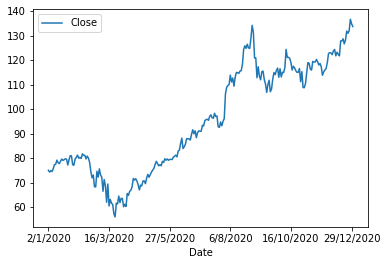

In [146]:
df.plot(x="Date", y=["Close"])
plt.show()

In [147]:
# Get the Close Price 
df = df[['Close']] 
# Take a look at the new data 
print(df.head())

   Close
0  75.09
1  74.36
2  74.95
3  74.60
4  75.80


In [148]:
print(df.describe())

            Close
count  252.000000
mean    95.198849
std     21.725303
min     56.090000
25%     77.387500
50%     91.420000
75%    115.720000
max    136.690000


In [149]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,252.0,95.198849,21.725303,56.09,77.3875,91.42,115.72,136.69


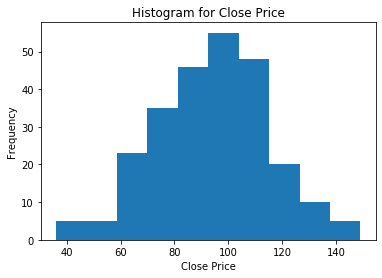

In [150]:
x = df
x = np.random.normal(95, 22, 252)
plt.hist(x)
plt.title("Histogram for Close Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

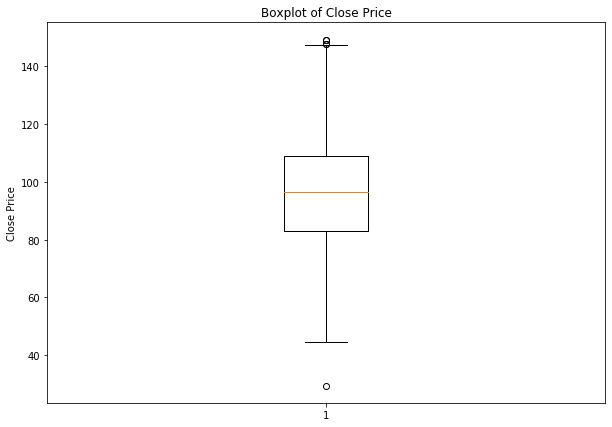

In [151]:
# Creating dataset
data = x
np.random.seed(10)
data = np.random.normal(95, 22, 252)
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
plt.title("Boxplot of Close Price")
plt.ylabel("Close Price")

# show plot
plt.show()

In [152]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Close']].shift(-forecast_out)
#print the new data set
print(df.tail())

      Close  Prediction
247  130.96         NaN
248  131.97         NaN
249  136.69         NaN
250  134.87         NaN
251  133.72         NaN


In [153]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[ 75.09]
 [ 74.36]
 [ 74.95]
 [ 74.6 ]
 [ 75.8 ]
 [ 77.41]
 [ 77.58]
 [ 79.24]
 [ 78.17]
 [ 77.83]
 [ 78.81]
 [ 79.68]
 [ 79.14]
 [ 79.43]
 [ 79.81]
 [ 79.58]
 [ 77.24]
 [ 79.42]
 [ 81.08]
 [ 80.97]
 [ 77.38]
 [ 77.17]
 [ 79.71]
 [ 80.36]
 [ 81.3 ]
 [ 80.01]
 [ 80.39]
 [ 79.9 ]
 [ 81.8 ]
 [ 81.22]
 [ 81.24]
 [ 79.75]
 [ 80.9 ]
 [ 80.07]
 [ 78.26]
 [ 74.54]
 [ 72.02]
 [ 73.16]
 [ 68.38]
 [ 68.34]
 [ 74.7 ]
 [ 72.33]
 [ 75.68]
 [ 73.23]
 [ 72.26]
 [ 66.54]
 [ 71.33]
 [ 68.86]
 [ 62.06]
 [ 69.49]
 [ 60.55]
 [ 63.22]
 [ 61.67]
 [ 61.2 ]
 [ 57.31]
 [ 56.09]
 [ 61.72]
 [ 61.38]
 [ 64.61]
 [ 61.94]
 [ 63.7 ]
 [ 63.57]
 [ 60.23]
 [ 61.23]
 [ 60.35]
 [ 65.62]
 [ 64.86]
 [ 66.52]
 [ 67.  ]
 [ 68.31]
 [ 71.76]
 [ 71.11]
 [ 71.67]
 [ 70.7 ]
 [ 69.23]
 [ 67.09]
 [ 69.03]
 [ 68.76]
 [ 70.74]
 [ 70.79]
 [ 69.64]
 [ 71.93]
 [ 73.45]
 [ 72.27]
 [ 73.29]
 [ 74.39]
 [ 75.16]
 [ 75.93]
 [ 77.53]
 [ 78.75]
 [ 77.85]
 [ 76.91]
 [ 77.39]
 [ 76.93]
 [ 78.74]
 [ 78.29]
 [ 79.81]
 [ 79.21]
 [ 79.72]
 [ 79.18]


In [154]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[ 81.24  79.75  80.9   80.07  78.26  74.54  72.02  73.16  68.38  68.34
  74.7   72.33  75.68  73.23  72.26  66.54  71.33  68.86  62.06  69.49
  60.55  63.22  61.67  61.2   57.31  56.09  61.72  61.38  64.61  61.94
  63.7   63.57  60.23  61.23  60.35  65.62  64.86  66.52  67.    68.31
  71.76  71.11  71.67  70.7   69.23  67.09  69.03  68.76  70.74  70.79
  69.64  71.93  73.45  72.27  73.29  74.39  75.16  75.93  77.53  78.75
  77.85  76.91  77.39  76.93  78.74  78.29  79.81  79.21  79.72  79.18
  79.53  79.56  79.49  80.46  80.83  81.28  80.58  82.88  83.36  86.
  88.21  83.97  84.7   85.75  88.02  87.9   87.93  87.43  89.72  91.63
  90.01  91.21  88.41  90.45  91.2   91.03  91.03  93.46  93.17  95.34
  95.75  95.92  95.48  97.06  97.72  96.52  96.33  98.36  97.    97.27
  92.85  92.61  94.81  93.25  95.04  96.19 106.26 108.94 109.67 110.06
 113.9  111.11 112.73 109.38 113.01 115.01 114.91 114.61 115.56 115.71
 118.28 124.37 125.86 124.82 126.52 125.01 124.81 129.04 134.18 131.4
 120.88 1

In [155]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [156]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.7232095159872804


In [158]:
#Create the decision trees regressor model
tree = DecisionTreeRegressor()
# Train the model
tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [159]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
tree_confidence = tree.score(x_test, y_test)
print("tree confidence: ", tree_confidence)

tree confidence:  0.8224904247800612


In [160]:
# Create and train the Support Vector Machines (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [161]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.8663144754712243


In [162]:
# Set x_forecast equal to the last 30 rows of the original data set from Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[119.39]
 [118.03]
 [118.64]
 [117.34]
 [113.85]
 [115.17]
 [116.03]
 [116.59]
 [119.05]
 [122.72]
 [123.08]
 [122.94]
 [122.25]
 [123.75]
 [124.38]
 [121.78]
 [123.24]
 [122.41]
 [121.78]
 [127.88]
 [127.81]
 [128.7 ]
 [126.66]
 [128.23]
 [131.88]
 [130.96]
 [131.97]
 [136.69]
 [134.87]
 [133.72]]


In [163]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[123.17534245 121.92377297 122.48513869 121.28878552 118.07703737
 119.29179598 120.08322962 120.59858176 122.86245008 126.23984712
 126.57114492 126.44230689 125.80731943 127.18772695 127.7674981
 125.37479175 126.71838839 125.9545629  125.37479175 130.98844896
 130.92402994 131.74307173 129.86571752 131.31054404 134.66953565
 133.82288571 134.7523601  139.0960424  137.42114796 136.36283553]


In [164]:
# Print decision trees model predictions for the next '30' days
tree_prediction = tree.predict(x_forecast)
print(tree_prediction)

[131.97 123.08 128.23 116.87 106.84 124.38 122.72 120.3  136.69 116.03
 116.5  116.5  116.03 116.5  116.5  116.03 116.5  116.03 116.03 114.97
 114.97 114.97 114.97 114.97 120.71 120.71 120.71 121.19 121.19 121.19]


In [165]:
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[132.12563711 125.39328917 129.29044668 122.47380072 115.24337829
 117.19371845 120.22939303 121.2640378  131.43107297 105.58425231
 107.76582789 106.79994334 104.79849667 113.03865107 116.43115756
 107.10235939 108.98971863 104.74328476 107.10235939 121.82261694
 121.36251492 126.04824786 115.18005191 123.96344502 119.95560622
 121.81121459 119.91046489 111.93501824 119.85901934 121.18888763]
